In [1]:
import numpy as np
from ipywidgets import interact, fixed
# import matplotlib as mpl
# pgf_with_latex = {                      # setup matplotlib to use latex for output
#     "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
#     "text.usetex": True,                # use LaTeX to write all text
#     "font.family": "serif",
#     "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
#     "font.sans-serif": [],
#     "font.monospace": [],
#     "axes.labelsize": 13,               # LaTeX default is 10pt font.
#     "font.size": 13,
#     "legend.fontsize": 13,               # Make the legend/label fonts a little smaller
#     "xtick.labelsize": 13,
#     "ytick.labelsize": 13,
# #     "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
#     "pgf.preamble": [
#         r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
#         r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
#         ]
#     }
# mpl.rcParams.update(pgf_with_latex)
# import texfig 
import matplotlib.pyplot as plt
import peakutils as pk
import edoxrd as xrd
# %matplotlib inline

/users/zatterin/Envs/py2/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [9]:
data_dir = '/users/zatterin/Documents/data/XRD/e16095/'
rep_dir = '/users/zatterin/Documents/report/img/'

In [10]:
data = !ls {data_dir} | grep ras | grep t2t
for index, fname in enumerate(data): 
    print(str(index)+'...'+fname)

0...e16095_04_t2t_001.ras
1...e16095_05_t2t_002.ras
2...e16095_06_t2t_003.ras


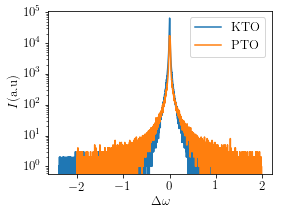

In [53]:
tt1, i1 = xrd.read_data(data[0],data_dir)
tt2, i2 = xrd.read_data(data[1],data_dir)
peak1 = tt1[i1==i1.max()]
om1 = tt1-peak1
peak2 = tt2[i2==i2.max()]
om2 = tt2-peak2

plt.figure(figsize=(4,3))
plt.plot(om1, i1, label='KTO')
plt.plot(om2, i2, label='PTO')
plt.yscale('log')
plt.ylabel(r'$I$(a.u)')
plt.xlabel(r'$\Delta\omega$')
plt.legend()
plt.savefig(rep_dir+'res_rc.pdf',bbox_inches='tight')

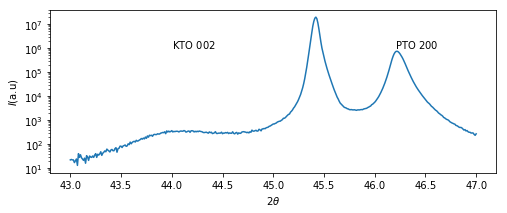

In [11]:
tt, i = xrd.read_data(data[1],data_dir)
# peak = tt[i==i.max()]
# om = tt-peak


fig = plt.figure(figsize=(8,3))
plt.plot(tt, i);plt.yscale('log')
plt.ylabel(r'$I$(a.u)')
# plt.xlabel(r'$\Delta\omega$')
plt.xlabel(r'$2\theta$')
plt.text(44, 1e6,'KTO $002$')
plt.text(46.2, 1e6,'PTO $200$')
plt.show()
# plt.gcf()
# plt.savefig(rep_dir+'ctr2ex.pdf',bbox_inches='tight')

#### Estimate out-of-plane lattice parameter 

In [13]:
dset = data[1]

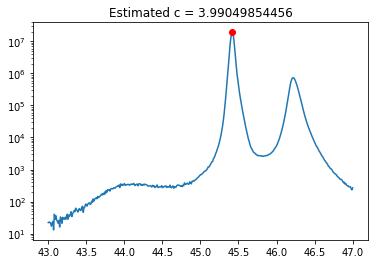

In [14]:
xdata, ydata = xrd.read_data(dset,data_dir,comments='*')
idxs = pk.indexes(ydata, thres=1e-6, min_dist=10)
film_peak = ydata[idxs].argsort()[::-1][0]
plt.plot(xdata,ydata)
plt.plot(xdata[idxs][film_peak],ydata[idxs][film_peak],'o',c='red'); plt.yscale('log')
c = 1/((2/1.5406) * np.sin(np.deg2rad(xdata[idxs][film_peak]/2)))
c = c*2
plt.title('Estimated c = {0}'.format(c)) # change multiplier depending on order of reflection!
plt.show()

#### Estimate thickness from Laue oscillations:

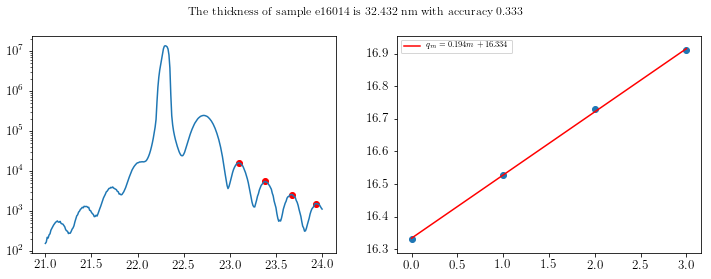

In [28]:
dset = data[0]
t = xrd.calc_thickness(dset, data_dir, threshold=1e-6, distance=20, side='r', comm='*')

#### Simulate starting from previous results:

In [29]:
dset = data[4]

In [30]:
@interact(sub='KTO', film='PTO', Nfilm=(0,600,0.1), c_film=(3.901, 4.201, 0.001), sc=(1e5,1e8,1e6),
         continuous_update=False)
def plt_ctr(sub, film, Nfilm=t/(0.1*c), c_film=c, sc=1e11):
    xdata, I = xrd.calc_ctr(dset, data_dir, sub, film, Nfilm, c_film, scale=sc, comm='*')
    plt.figure(figsize=(10,6))
    plt.plot(*xrd.read_data(dset,data_dir,comments='*'), label='Obs')
    plt.plot(xdata, I.real, label='Calc')
    plt.yscale('log')
    plt.ylabel(r'$I$ [cnts]')
    plt.xlabel(r'$2\theta$')
    plt.legend()
    plt.title('Film thickness: {0} nm \n Film out-of-plane parameter: {1} A \n Scale: {2}'\
              .format(Nfilm*c_film/10, c_film, sc), fontsize=9)
    plt.show()

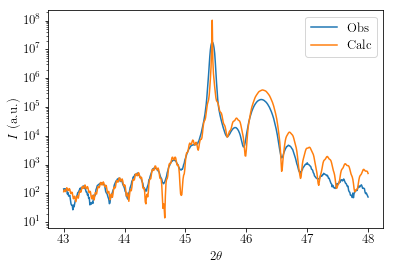

In [42]:
xdata, I = xrd.calc_ctr(dset, data_dir, 'KTO', 'PTO', 82.68, 3.92, scale=5e5, comm='*')
plt.plot(*xrd.read_data(dset,data_dir,comments='*'), label='Obs')
plt.plot(xdata, I.real, label='Calc')
plt.yscale('log')
plt.ylabel(r'$I$ (a.u.)')
plt.xlabel(r'$2\theta$')
plt.legend()
plt.savefig(rep_dir+'simex.pdf',bbox_inches='tight')